In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from matplotlib import rcParams
rcParams['font.family'] = 'monospace'
rcParams['font.monospace'] = ['Fira Code']

# common plot formatting for below
def format_plot(ax, title):
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    ax.set_xlabel('feature 1', color='black')
    ax.set_ylabel('feature 2', color='black')
    ax.set_title(title, color='black')
    

In [2]:
from mpp import load_data
Xtrain, ytrain = load_data("datasets/synth.tr")
Xtest, ytest = load_data("datasets/synth.te")

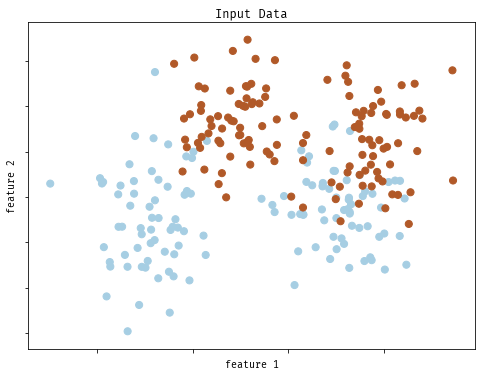

In [3]:
# plot the data
fig, ax = plt.subplots(figsize=(8, 6))
point_style = dict(cmap='Paired', s=50)
ax.scatter(Xtrain[:, 0], Xtrain[:, 1], c=ytrain, **point_style)

# format plot
format_plot(ax, 'Input Data')


# Gaussian naive bayes

In [4]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)
accuracy_score(ytest, y_model)

GaussianNB(priors=None, var_smoothing=1e-09)

0.899

In [5]:
model.score(Xtrain, ytrain)

0.844

In [6]:
model.score(Xtest, ytest)

0.899

# MPP

In [7]:

from sklearn.metrics import accuracy_score
from mpp import load_data, mpp
Xtrain, ytrain = load_data("datasets/synth.tr")
Xtest, ytest = load_data("datasets/synth.te")
model = mpp()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)


Text(0.5, 12.5, 'predicated value')

Text(89.18, 0.5, 'true value')

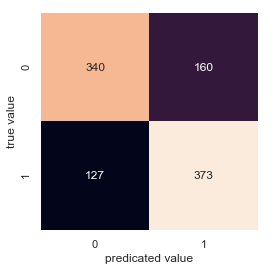

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()
mat = confusion_matrix(ytest, y_model)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('predicated value')
plt.ylabel('true value')

Text(0.5, 1.0, 'Naive Bayes Model')

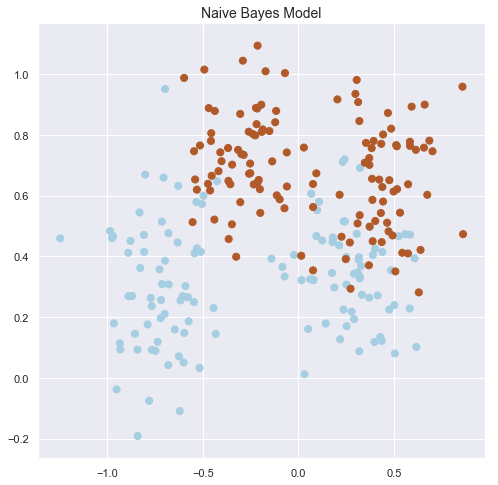

In [21]:
fig, ax = plt.subplots(figsize=(8, 8))
point_style = dict(cmap='Paired', s=50)
ax.scatter(Xtrain[:, 0], Xtrain[:, 1], c=ytrain, **point_style)
ax.set_title('Naive Bayes Model', size=14)

# X = Xtrain
# y = ytrain

# xlim = (-1, 1)
# ylim = (-1, 1)

# xg = np.linspace(xlim[0], xlim[1], 20)
# yg = np.linspace(ylim[0], ylim[1], 20)
# xx, yy = np.meshgrid(xg, yg)
# Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T


# for label, color in enumerate(['red', 'blue']):
#     mask = (y == label)
#     mu, std = X[mask].mean(0), X[mask].std(0)
#     P = np.exp(-0.5 * (Xgrid - mu) ** 2 / std ** 2).prod(1)
#     Pm = np.ma.masked_array(P, P < 0.03)
#     ax.pcolorfast(xg, yg, Pm.reshape(xx.shape), alpha=0.5,
#                   cmap=color.title() + 's')
#     ax.contour(xx, yy, P.reshape(xx.shape),
#                levels=[0.01, 0.1, 0.5, 0.9],
#                colors=color, alpha=0.2)
    
# ax.set(xlim=xlim, ylim=ylim)
